### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

C:\Users\gdeep\AppData\Local\Temp\ipykernel_15256\1188858295.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import plotly.io as pio
pio.renderers.default = "svg"


### Loading the data

In [3]:
df = pd.read_csv("C:\\Users\\gdeep\\Downloads\\Unemployment in India.csv")

###  Data Cleaning

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.shape

(768, 7)

#### There are 7 columns in the dataset

In [6]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip().str.replace(" ","_").str.lower()
df.columns

Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'area'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   region                                   740 non-null    object 
 1   date                                     740 non-null    object 
 2   frequency                                740 non-null    object 
 3   estimated_unemployment_rate_(%)          740 non-null    float64
 4   estimated_employed                       740 non-null    float64
 5   estimated_labour_participation_rate_(%)  740 non-null    float64
 6   area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
df.describe()

,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


### Date from object to datetime

In [10]:
df['date'] = pd.to_datetime(df['date'],dayfirst = 'True')

df['date'].dtypes

dtype('<M8[ns]')

In [11]:
df.isnull().sum()

region                                     28
date                                       28
frequency                                  28
estimated_unemployment_rate_(%)            28
estimated_employed                         28
estimated_labour_participation_rate_(%)    28
area                                       28
dtype: int64

There are 28 missing values in the dataset

In [12]:
df = df.dropna()

df.shape

(740, 7)

In [13]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

In [14]:
df['year'] = df['date'].dt.year

df.head()

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019


In [15]:
df['month'] = df['date'].dt.month

df.head()

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area,year,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9


In [16]:
import calendar

df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

df.head()

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area,year,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,Sep


In [17]:
df.dtypes

region                                             object
date                                       datetime64[ns]
frequency                                          object
estimated_unemployment_rate_(%)                   float64
estimated_employed                                float64
estimated_labour_participation_rate_(%)           float64
area                                               object
year                                                int32
month                                              object
dtype: object

### Univariate - Statistical Non Visual Analysis

In [18]:
discrete_df = df.select_dtypes(include=["object","int32"])

numerical_df = df.select_dtypes(include=["float64"])

In [19]:
def discrete_univariate_analysis(discrete_data):
  for col_name in discrete_data:
    print("*"*10, col_name, "*"*10)
    print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
    print('Value Counts: \n', discrete_data[col_name].value_counts())
    print()

In [20]:
discrete_univariate_analysis(discrete_df)

********** region **********
count                                                    740
nunique                                                   28
unique     [Andhra Pradesh, Assam, Bihar, Chhattisgarh, D...
Name: region, dtype: object
Value Counts: 
 region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

********** frequency **********
count                      740
nun

In [21]:
def numerical_univariate_analysis(numerical_data):
    for col in numerical_data:
        print("*"*10,col,"*"*10)
        print(numerical_data[col].agg(['min','max','mean','median','std']))
        print()

In [22]:
numerical_univariate_analysis(numerical_df)

********** estimated_unemployment_rate_(%) **********
min        0.000000
max       76.740000
mean      11.787946
median     8.350000
std       10.721298
Name: estimated_unemployment_rate_(%), dtype: float64

********** estimated_employed **********
min       4.942000e+04
max       4.577751e+07
mean      7.204460e+06
median    4.744178e+06
std       8.087988e+06
Name: estimated_employed, dtype: float64

********** estimated_labour_participation_rate_(%) **********
min       13.330000
max       72.570000
mean      42.630122
median    41.160000
std        8.111094
Name: estimated_labour_participation_rate_(%), dtype: float64



###  Univariate Visual Analysis

<Axes: xlabel='estimated_unemployment_rate_(%)', ylabel='Count'>

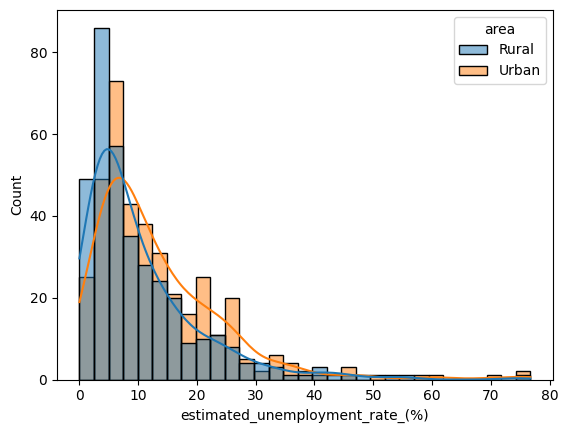

In [23]:
sns.histplot(data=df,x="estimated_unemployment_rate_(%)",hue='area',kde=True)

<Axes: xlabel='estimated_employed', ylabel='Count'>

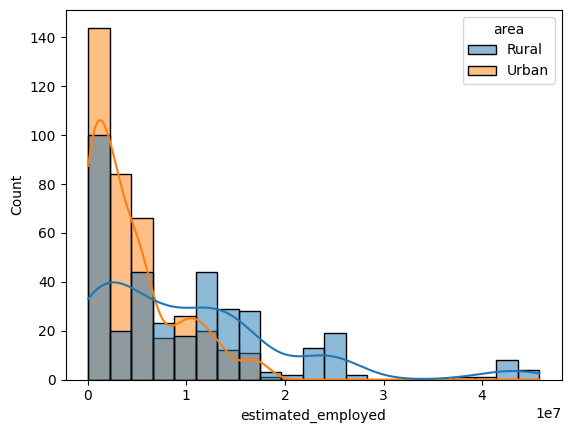

In [24]:
sns.histplot(data=df,x="estimated_employed",hue='area',kde=True)

<Axes: xlabel='estimated_labour_participation_rate_(%)', ylabel='Count'>

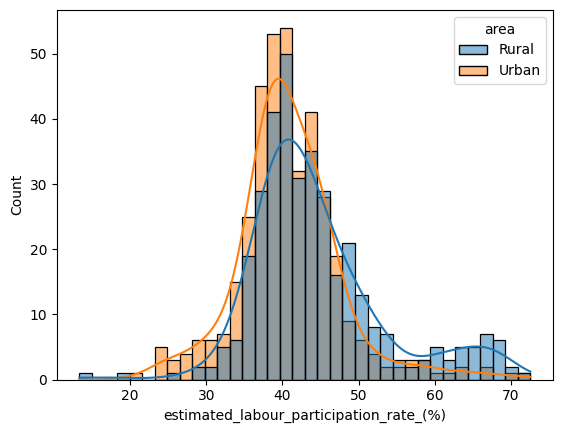

In [25]:
sns.histplot(data=df,x="estimated_labour_participation_rate_(%)",hue='area',kde=True)

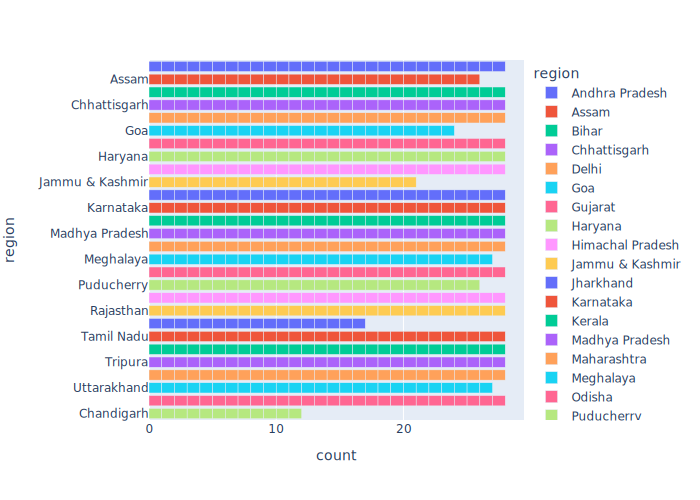

In [26]:
fig = px.bar(df,y='region',color='region')

fig.show()

<Axes: xlabel='year', ylabel='count'>

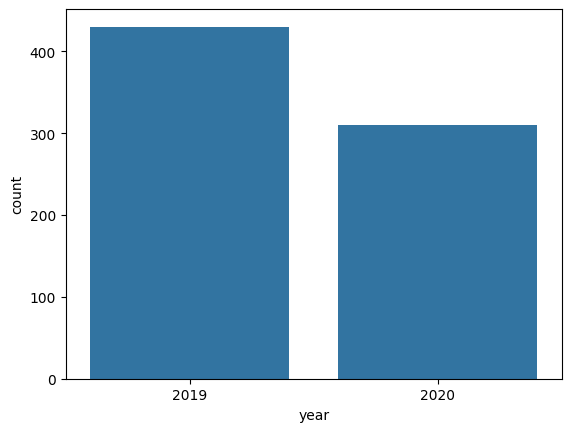

In [27]:
sns.countplot(data=df, x='year')

<Axes: xlabel='month', ylabel='count'>

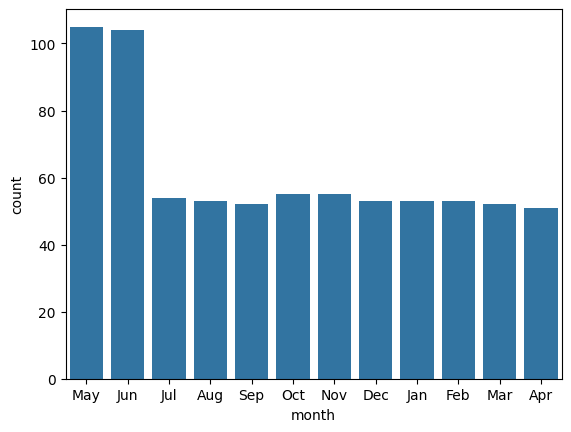

In [28]:
sns.countplot(data=df,x='month')

<Axes: xlabel='area', ylabel='count'>

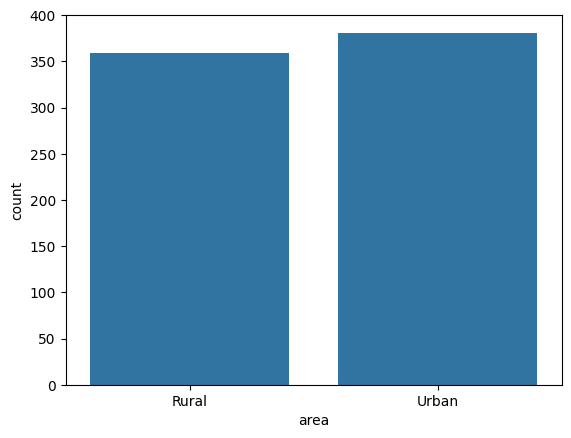

In [29]:
sns.countplot(data=df,x="area")

### Bivariate Visual Analysis

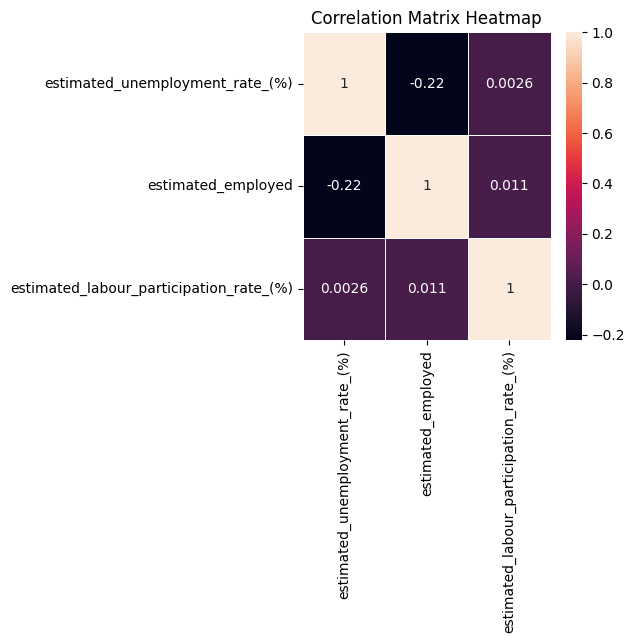

In [30]:
plt.figure(figsize=(4,4))

plt.title("Correlation Matrix Heatmap")

sns.heatmap(numerical_df.corr(), annot=True, linewidths=0.5)

plt.show()

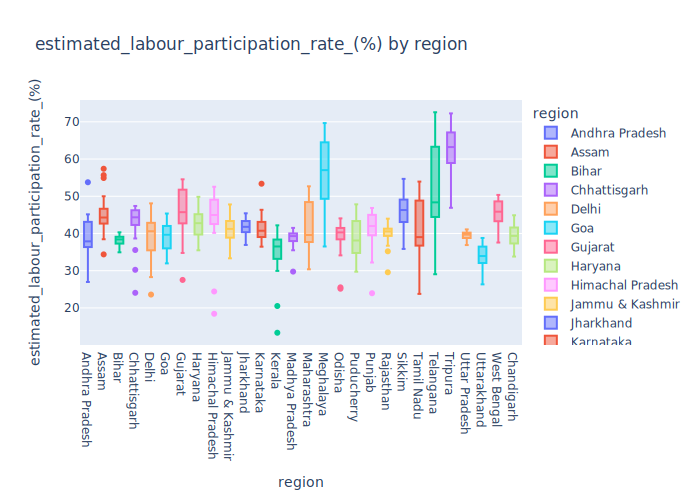

In [31]:
import plotly.express as px

fig = px.box(df, x='region',y='estimated_labour_participation_rate_(%)',color='region',title="estimated_labour_participation_rate_(%) by region")

fig.show()

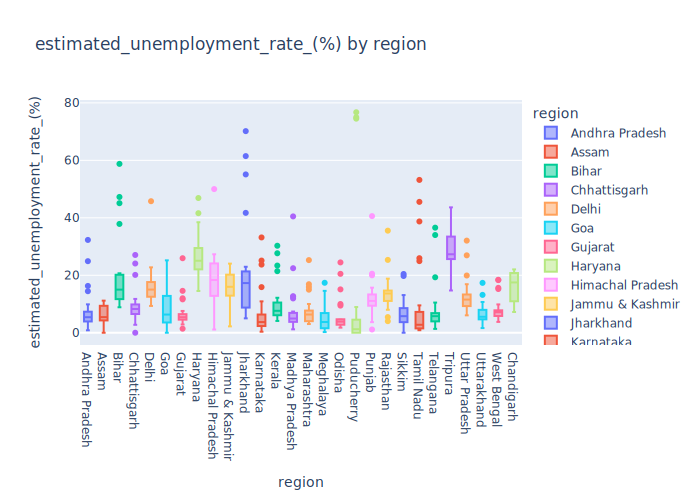

In [32]:
fig = px.box(df, x='region',y='estimated_unemployment_rate_(%)',color='region',title="estimated_unemployment_rate_(%) by region")

fig.show()

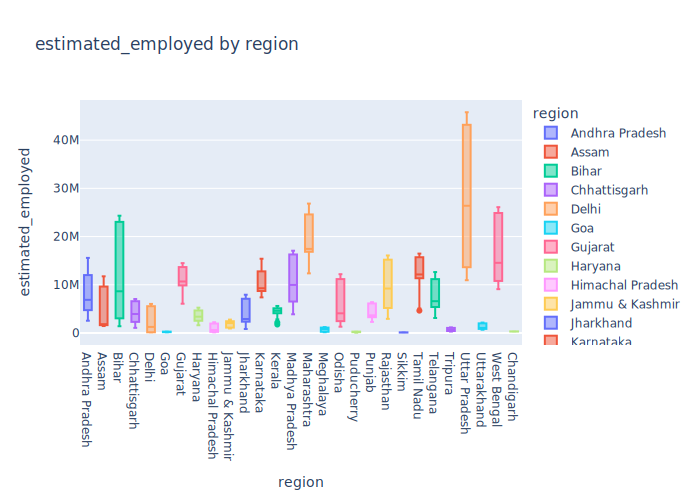

In [33]:
fig = px.box(df, x='region',y='estimated_employed',color='region',title="estimated_employed by region")

fig.show()

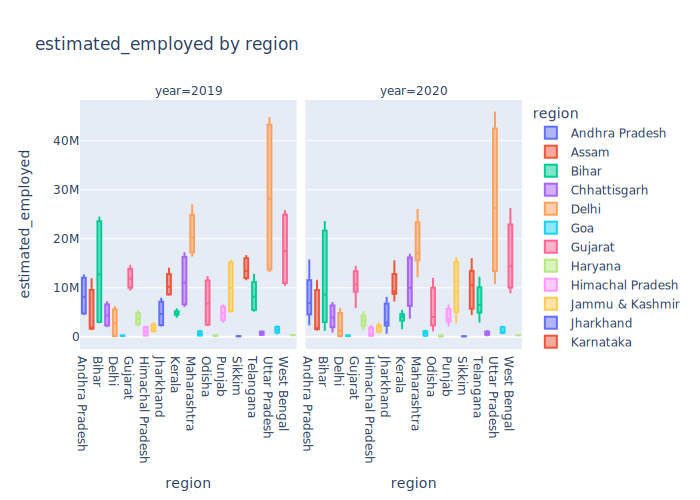

In [34]:
fig = px.box(df, x='region',y='estimated_employed',facet_col='year',color='region',title="estimated_employed by region")

fig.show()

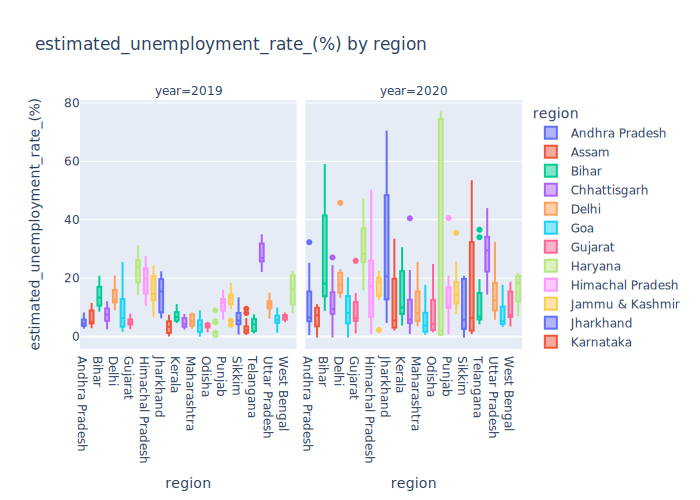

In [35]:
fig = px.box(df, x='region',y='estimated_unemployment_rate_(%)',facet_col='year',color='region',title="estimated_unemployment_rate_(%) by region")

fig.show()

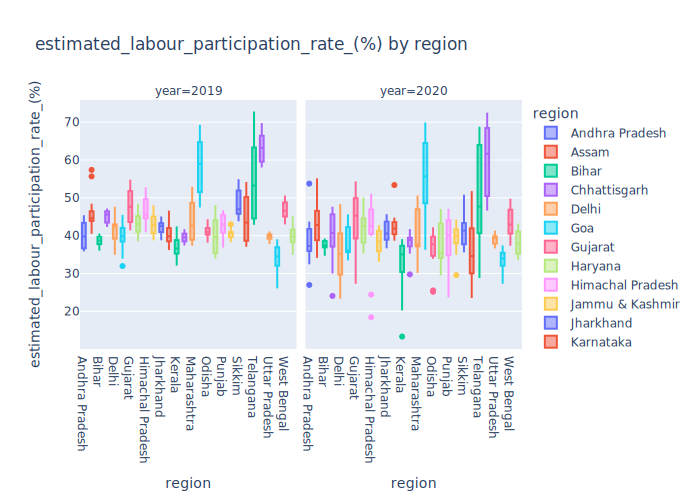

In [36]:
fig = px.box(df, x='region',y='estimated_labour_participation_rate_(%)',facet_col='year',color='region',title="estimated_labour_participation_rate_(%) by region")

fig.show()

In [37]:
state=df.groupby(['region','year'])[['estimated_unemployment_rate_(%)']].mean()
state=pd.DataFrame(state).reset_index()

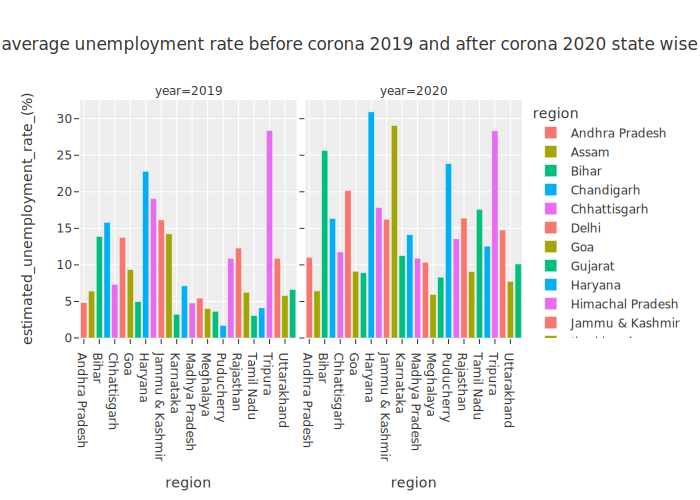

In [38]:
fig=px.bar(state,x='region',y='estimated_unemployment_rate_(%)',color='region',facet_col='year',title='average unemployment rate before corona 2019 and after corona 2020 state wise',template='ggplot2')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [39]:
before = df[df['year']==2019]

after = df[df['year']==2020]

In [40]:
before_corona = before.groupby('region')['estimated_unemployment_rate_(%)'].mean().reset_index()

after_corona = after.groupby('region')['estimated_unemployment_rate_(%)'].mean().reset_index()

In [41]:
unemployment_rate = before.groupby('region')['estimated_unemployment_rate_(%)'].mean().reset_index()

unemployment_rate['unemployment_rate_after_corona'] = after_corona['estimated_unemployment_rate_(%)']

unemployment_rate.columns = ['region','unemployment_rate_before_corona','unemployment_rate_after_corona']

unemployment_rate.head()

,region,unemployment_rate_before_corona,unemployment_rate_after_corona
0,Andhra Pradesh,4.826875,11.010833
1,Assam,6.420667,6.438182
2,Bihar,13.882500,25.632500
3,Chandigarh,15.822500,16.330000
4,Chhattisgarh,7.346875,11.765000


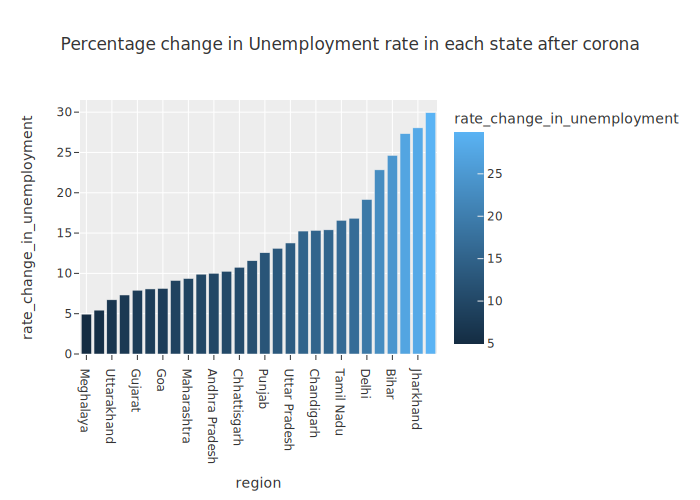

In [42]:
unemployment_rate['rate_change_in_unemployment'] =round(unemployment_rate['unemployment_rate_after_corona']-
                                                        unemployment_rate['unemployment_rate_before_corona']
                                              /unemployment_rate['unemployment_rate_before_corona'],2)

fig = px.bar(unemployment_rate,x='region',y='rate_change_in_unemployment',color='rate_change_in_unemployment',
            title='Percentage change in Unemployment rate in each state after corona',template='ggplot2')

fig.update_layout(xaxis={'categoryorder':'total ascending'})

fig.show()

After analysing the dataset, we can gain insights on how the corona crisis affected the unemployment rate in 
various states of India.
The labour pariticipation rate got decreased during corona. 
The states most affected in unemployment rate due to corona are Haryana, Jharkhand, Tripura, Bihar and Puducherry 
whereas Uttarpradesh is the state with most employees.